In [82]:
import numpy as np
from copy import deepcopy
from sklearn.metrics import r2_score
import matplotlib.pylab as plt
%matplotlib inline


In [83]:
path_to_data = 'Data/Stocks/a.us.txt'

with open(path_to_data, 'r') as stream:
    data_lines = stream.readlines()

print(data_lines[0])
print(data_lines[1])

X = list()

data_lines = data_lines[1:]

for line in data_lines:
    try:
        X.append(float(line.split(',')[1]))
    except:
        print(line)

X = np.array(X)

Date,Open,High,Low,Close,Volume,OpenInt

1999-11-18,30.713,33.754,27.002,29.702,66277506,0



In [145]:
class ARMA_OGD:
    """
    AutoRegressive Moving Average model with parameter estimation by Online Gradient Descent.
    """
    
    def __init__(self, k = 3, q = 3, eta = 0.00001, threshold = 0.00001, logger=False, plot=False):
        """
        
        """
        self.k = k
        self.q = q
        self.eta = eta
        self.threshold = threshold
        self.w_ma = np.random.randn(k)
        self.w_ar = np.random.randn(q)
        
        self.logger = logger
        self.plot = plot
        
    def fit(self, X, n_epochs = 100):
        max_kq = max(self.k, self.q)
        k_offset = max_kq - self.k
        q_offset = max_kq - self.q
        
        w_ma = self.w_ma
        w_ar = self.w_ar
        
        
        n = X.shape[0]
        
        Y = np.random.randn(n)
        
        ma_changes = list()
        ar_changes = list()
        errors = list()
        
        count = 0
        
        for i in range(n_epochs):
            old_ma = w_ma.copy()
            old_ar = w_ar.copy()
            
            for j in np.random.permutation(n - max_kq):
                count += 1
                
                curr_idx = j + max_kq
                
                x_prev = X[j+k_offset : curr_idx]
                y_prev = Y[j+q_offset : curr_idx]
                
                pred = np.dot(x_prev, w_ma) + np.dot(y_prev, w_ar)
                
                Y[curr_idx] = pred
                err = X[curr_idx] - pred
                
                w_ma += err * x_prev * self.eta 
                w_ar += err * y_prev * self.eta
                
            ma_change = np.linalg.norm(old_ma - w_ma)
            ma_changes.append(ma_change)
            
            ar_change = np.linalg.norm(old_ar - w_ar)
            ar_changes.append(ar_change)
            
            mean_abs_error = np.mean(np.abs(Y[max_kq:] - X[max_kq:]))
            errors.append(mean_abs_error)
                       
            
            if ar_change < self.threshold and ma_change < self.threshold:
#                 print(errors[-1])
                break
        
#         print((X[max_kq:], Y[max_kq:]))
#         print(r2_score(X[max_kq:], Y[max_kq:]))

     
        self.w_ma = w_ma
        self.w_ar = w_ar
    
    def predict(self, X):
        max_kq = max(self.k, self.q)
        
        n = X.shape[0]
        Y = np.zeros(n)
        
        for i in np.arange(n - max_kq):
            curr_idx = i + max_kq
            
            x_prev = X[i + max_kq - self.k : curr_idx]
            y_prev = Y[i + max_kq - self.q : curr_idx]
            
            Y[curr_idx] = np.dot(x_prev, self.w_ma) + np.dot(y_prev, self.w_ar)
            
        
        return Y

In [146]:
model = ARMA_OGD()

In [143]:
# model.fit(X[:3000], n_epochs=300)

In [118]:
# model.predict(X[3000:3010])

3
7


array([  0.        ,   0.        ,   0.        ,  28.46154525,
        21.05885876,  26.11103809,  23.70635271,  25.1438271 ,
        24.33297812,  25.6643984 ])

In [119]:
# X[3000:3010]

array([ 25.517,  26.893,  26.893,  23.79 ,  24.181,  24.849,  24.685,
        24.842,  25.666,  25.253])

In [131]:
test_len = 100

In [147]:
for epoch in range(30, 200, 20):
    model.fit(X[:len(X) - test_len], n_epochs=epoch)
    pred_vals = model.predict(X[len(X) - test_len:])
    actual_vals = X[len(X) - test_len:]
    print(epoch, " : ", r2_score(pred_vals[3:], actual_vals[3:]))

3
97
30  :  0.958000540212
3
97
50  :  0.880959131292
3
97
70  :  0.940857304665
3
97
90  :  0.470694965646
3
97
110  :  0.934974503768
3
97
130  :  0.943990131034
3
97
150  :  0.774452539231
3
97
170  :  0.940785690612
3
97
190  :  0.939372047478


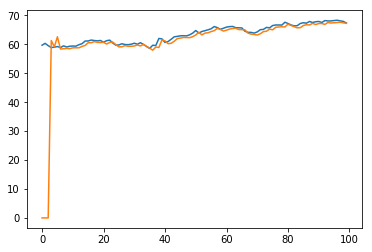

In [139]:
plt.plot([x for x in range(test_len)], actual_vals)
        
plt.plot([x for x in range(test_len)], pred_vals)

In [140]:
r2_score(pred_vals[3:], actual_vals[3:])

0.89530655023746952